# 数组

## [二分查找](https://leetcode-cn.com/problems/binary-search/)
给定一个`n`个元素有序的（`升序`）整型数组`nums`和一个目标值`target`，写一个函数搜索`nums`中的`target`，如果目标值存在返回下标，否则返回-1。
```
示例1
输入: nums = [-1,0,3,5,9,12], target = 9
输出: 4
解释: 9 出现在 nums 中并且下标为 4

示例2
输入: nums = [-1,0,3,5,9,12], target = 2
输出: -1
解释: 2 不存在 nums 中因此返回 -1
```

In [9]:
class Solution:
    def search(self, nums, target):
        left = 0
        right = len(nums) - 1
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] < target:
                left = mid + 1
            elif nums[mid] > target:
                right = mid - 1
            else:
                return mid
        
        return -1

In [10]:
test = Solution()
test.search([-1,0,3,5,9,12], 9)
# 4

4

## [移除元素](https://leetcode-cn.com/problems/remove-element/)


给你一个数组`nums`和一个值`val`，你需要`原地`移除所有数值等于`val`的元素，并返回移除后数组的新长度。不要使用额外的数组空间，你必须仅使用`O(1)`额外空间并`原地`修改输入数组。元素的顺序可以改变。你不需要考虑数组中超出新长度后面的元素。

```
示例 1：
输入：nums = [3,2,2,3], val = 3
输出：2, nums = [2,2]
解释：函数应该返回新的长度 2, 并且 nums 中的前两个元素均为 2。你不需要考虑数组中超出新长度后面的元素。例如，函数返回的新长度为 2 ，而 nums = [2,2,3,3] 或 nums = [2,2,0,0]，也会被视作正确答案。

示例 2：
输入：nums = [0,1,2,2,3,0,4,2], val = 2
输出：5, nums = [0,1,4,0,3]
解释：函数应该返回新的长度 5, 并且 nums 中的前五个元素为 0, 1, 3, 0, 4。注意这五个元素可为任意顺序。你不需要考虑数组中超出新长度后面的元素。
```

In [11]:
class Solution:
    def removeElement(self, nums, val):
        slow = 0
        fast = 0
        while fast < len(nums):
            if nums[fast] != val:
                nums[slow] = nums[fast]
                slow += 1
            fast += 1
        return slow

In [12]:
test = Solution()
test.removeElement([3,2,2,3], 3)
# 2

2

## [有序数组的平方](https://leetcode-cn.com/problems/squares-of-a-sorted-array/)

给你一个按`非递减顺序`排序的整数数组`nums`，返回`每个数字的平方`组成的新数组，要求也按`非递减顺序`排序。

```
示例 1：
输入：nums = [-4,-1,0,3,10]
输出：[0,1,9,16,100]
解释：平方后，数组变为 [16,1,0,9,100],排序后，数组变为 [0,1,9,16,100]

示例 2：
输入：nums = [-7,-3,2,3,11]
输出：[4,9,9,49,121]
```

In [14]:
class Solution:
    def sortedSquares(self, nums):
        left = 0
        right = len(nums) - 1
        
        res = []
        while left <= right:
            l = nums[left] ** 2
            r = nums[right] ** 2
            if l > r:
                res.append(l)
                left += 1
            else:
                res.append(r)
                right -= 1
        return res[::-1]

In [15]:
test = Solution()
test.sortedSquares([-4,-1,0,3,10])
#[16,1,0,9,100]

[0, 1, 9, 16, 100]

## [长度最小的子数组](https://leetcode-cn.com/problems/minimum-size-subarray-sum/)

给定一个含有`n`个正整数的数组和一个正整数`target`。
找出该数组中满足其和`≥target`的长度最小的`连续子数组[numsl, numsl+1, ..., numsr-1, numsr]`，并返回其长度。如果不存在符合条件的子数组，返回`0`。

```
示例 1：
输入：target = 7, nums = [2,3,1,2,4,3]
输出：2
解释：子数组 [4,3] 是该条件下的长度最小的子数组。

示例 2：
输入：target = 4, nums = [1,4,4]
输出：1

示例 3：
输入：target = 11, nums = [1,1,1,1,1,1,1,1]
输出：0
```

In [16]:
class Solution:
    def minSubArrayLen(self, target, nums):
        left = 0
        sum_ = 0
        res = float('inf')

        for right in range(len(nums)):
            sum_ += nums[right]
            while sum_ >= target:
                res = min(res, right - left + 1)
                sum_ -= nums[left]
                left += 1
        
        return 0 if res > len(nums) else res

In [17]:
test = Solution()
test.minSubArrayLen(7, [2,3,1,2,4,3])
# 2

2

## [螺旋矩阵](https://leetcode-cn.com/problems/spiral-matrix-ii/)

给你一个正整数`n`，生成一个包含`1`到`n^2`所有元素，且元素按顺时针顺序螺旋排列的`n*n`正方形矩阵`matrix`。
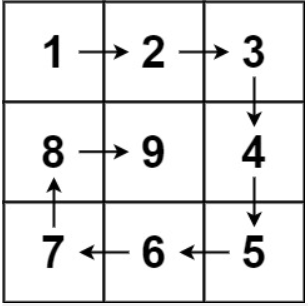
```
示例 1：

输入：n = 3
输出：[[1,2,3],[8,9,4],[7,6,5]]

示例 2：
输入：n = 1
输出：[[1]]
```

In [18]:
class Solution:
    def generateMatrix(self, n):
        res = [[0 for _ in range(n)] for _ in range(n)]
        left = 0
        right = n-1
        up = 0
        down = n-1

        num = 1

        while left < right and up < down:

            for i in range(left, right):
                res[up][i] = num
                num += 1

            for j in range(up, down):
                res[j][right] = num
                num += 1
            
            for x in range(right, left, -1):
                res[down][x] = num
                num += 1
            
            for y in range(down, up, -1):
                res[y][left] = num
                num += 1
            
            left += 1
            right -= 1
            up += 1
            down -= 1
        
        if n % 2 == 1:
            res[n // 2][n // 2] = num
        
        return res

In [19]:
test = Solution()
test.generateMatrix(3)
# [[1,2,3],[8,9,4],[7,6,5]]

[[1, 2, 3], [8, 9, 4], [7, 6, 5]]